# Подготовка данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import seaborn
import scipy
from drr import*
%matplotlib inline

In [2]:
data = pd.read_csv('compare_binning.csv',engine='python', sep=';', header=0)

In [6]:
data.head()

,_dataobs_,ACCRUED_to_limit,ACCRUED_DIV_REST_OD,good_bad,min_ratio_fact_plan,avg_ratio_fact_plan,max_ratio_fact_plan,count_payments,sum_payment,our_active,...,part_connect_calls_6m,part_rpc_6m,part_promises_6m,part_promises2_6m,part_connect_promises_6m,part_connect_promises2_6m,part_kept_6m,part_kept_part_6m,days_not_paid,part_1_good_in_1_good_bad
0,1,-0.054718,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,-0.071214,0.071274,0,0.004,2.494678,268.349,900.0,88521567.75,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.0,NaN
2,5,-0.028099,0.028251,0,0.013,1.099711,36.484,90.0,672173.67,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.500000
3,7,-0.116671,0.116671,1,0.062,2.009550,19.147,545.0,71988567.00,125.0,...,0.303571,0.0,0.0,NaN,0.0,NaN,NaN,NaN,4.0,NaN
4,11,-0.024794,0.024985,0,0.009,1.026960,32.360,225.0,1308830.37,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.515152


In [7]:
len(data)

4878

In [8]:
X = data.drop(['good_bad'], 1)
y = data['good_bad']

In [9]:
X_train, y_train = X, y 

In [10]:
# from sklearn.cross_validation import train_test_split

# (X_train, 
#  X_test, 
#  y_train, y_test) = train_test_split(X, y, stratify=y,
#                                      test_size=0.3, random_state = 429) 

In [11]:
real_features, discrete_features, cat_features = split_to_diff_types(X, n_uniq_to_be_cat = 0)

In [12]:
#числовые данные - это вещественные и целочисленные
numeric_cols_0 = real_features+discrete_features

In [13]:
pd.options.display.max_rows = 600

In [14]:
table_miss = miss_values_table(X, numeric_cols_0)
table_miss

,Missing Values,% of Total Values,Means
part_connect_promises2_6m,2736,56.088561,0.451
part_promises2_6m,2704,55.432554,0.295
part_kept_part_6m,2556,52.398524,0.014
part_kept_6m,2556,52.398524,0.474
max_loan_duration,2532,51.906519,57.610
avg_loan_duration,2532,51.906519,49.617
min_loan_duration,2532,51.906519,42.164
part_1_good_in_1_good_bad,2452,50.266503,0.476
part_connect_promises_6m,1933,39.626896,0.342
part_connect_promises2,1783,36.551866,0.499


In [15]:
#отбор признаков, имеющих менее 90% пропусков
more_reason_vars = table_miss[table_miss['% of Total Values'] < 90]
first_filtr_vars = more_reason_vars.T.columns

In [16]:
#отбор признаков, имеющих не более заданного параметра k нулевых значений 
second_filtr = sec_filtr(first_filtr_vars, X_train, k = 0.5)

In [17]:
#получение списка вещественных и категориальных переменных, удовлетворяющих описанным выше условиям
numeric_cols, cat_features_new = return_new_cats_after_filtrs(second_filtr, numeric_cols_0)

In [18]:
# выбор критического хи квадрат 
from scipy.stats import chi2
chi_crit = chi2.isf(q=0.05, df=1)
chi_crit

3.8414588206941285

In [19]:
#very_good_vars = ['part_del_60', 'count_month_event', 'LOAN_MONTH_PERIOD', 'PAYMENTAMOUNT_12M', 'cur_sum_to_all_sum_card', 'ratio_maxsumcl_req_cred', 'BCH_3m_delinquency', 'nal_beznal_24']

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve

In [21]:
def sew_inds_limit(table):
    import scipy
    indexes_for_sewing = []
    for i in range(len(table)-1):
        elem1 = table[i][:-1]
        elem2 = table[i+1][:-1]
        pair = [elem1, elem2]
        chi2_, prob, df, expected = scipy.stats.chi2_contingency(pair)
        indexes_for_sewing.append([chi2_, [table[i][-1],table[i+1][-1]]])
    zz = sorted(indexes_for_sewing)   
    if zz != []:
        return zz[0][1]
    else:
        return []

In [38]:
def sew_inds_entropy(table, tg, max_bins):
    import math as mt
    import scipy
    indexes_for_sewing = []
    indexes_for_sewing0 = []
    for i in range(len(table)-1):
        elem1 = table[i][:-3]
        elem2 = table[i+1][:-3]
        a1 = elem1[0] #event
        b1 = elem1[1] #count
        a2 = elem2[0] #event
        b2 = elem2[1] #count
        a0 = a1 + a2 
        b0 = b1 + b2
        dr0 = a0/b0
        H0 = -dr0*np.log(dr0)-(1-dr0)*np.log(1-dr0)
        dr1 = a1/b1
        dr2 = a2/b2
        H1 = (-dr1*np.log(dr1)-(1-dr1)*np.log(1-dr1))*b1/(b1+b2)
        
        
        #WOE1 = np.log((1-dr1)/dr1)
        #WOE2 = np.log((1-dr2)/dr2)
        #PP1 = -dr1*mt.log2(dr1)
        #G1 = 2*dr1*(1-dr1)*b1/(b1+b2)
        
        H2 = (-dr2*np.log(dr2)-(1-dr2)*np.log(1-dr2))*b2/(b1+b2)
        dd = H0 - H1 - H2
        #dd = abs(H1 - H2)
        dist = np.abs(dr2 - dr1)
        
        #PP1 = -dr2*mt.log2(dr2)
        #G2 = 2*dr2*(1-dr2)*b2/(b1+b2)
        delta = np.abs(dd)
        #print(H1,H2, delta)
        indexes_for_sewing0.append([delta, [table[i][-3],table[i+1][-3]], [table[i+1][-2], table[i+1][-1]]])
        if tg < 0 :
            print(1)
            if dr2 > dr1:
                indexes_for_sewing.append([dist, [table[i][-3],table[i+1][-3]], [table[i+1][-2], table[i+1][-1]]])
        if tg >= 0 :
            if dr2 < dr1:
                print(2)
                indexes_for_sewing.append([dist, [table[i][-3],table[i+1][-3]], [table[i+1][-2], table[i+1][-1]]])
    print(indexes_for_sewing)
    bound = []
    [bound.append([x[0], x[-1]]) for x in indexes_for_sewing]
    print(bound)
    zz = sorted(indexes_for_sewing) 
    print(zz)
    if zz != []:
        print('сшиваю по монотонности')
        return zz[-1][1]
       
    else:
        if len(indexes_for_sewing0) >= max_bins:
            print('kkk')
            bound = []
            [bound.append([x[0], x[-1]]) for x in indexes_for_sewing0]
            #print(bound)
            zz = sorted(indexes_for_sewing0) 
            if zz != []:
                print('сшиваю по энтропии')
                return zz[0][1]
                
            else:
                return []
        else:
            return []     

In [33]:
numeric_cols.index('del_frequency_all_old')

35

In [39]:
def monotonig_event_rate_binning(X_train, y_train, numeric_cols, chi_crit, max_bins):
    import numpy as np
    import pandas as pd
    import math
    import scipy
    from drr import sew_inds
    from sklearn.linear_model import LinearRegression
    num_bad = len(y_train[y_train == 1]) # общее количество бэдов
    num_good = len(y_train[y_train == 0]) # общее количество гудов
    d = pd.DataFrame({},index=[]) # создание пустого датасета(позднее он будет заполнен WOE, IV)
    #flag = True
    for z in numeric_cols[35:36]:
        max_bin = 20
        X = X_train[z]
        #разделяем датасет на пропуски и не пропуски
        df1 = pd.DataFrame({"X": X, "Y": y_train})
        justmiss = df1[['X','Y']][df1.X.isnull()]
        notmiss = df1[['X','Y']][df1.X.notnull()]
        n = math.floor(max_bin*(1-len(justmiss)/(len(notmiss)+len(justmiss))))
        max_bins0 = max_bins - 1
        #если доля пропусков меньше 5%, то заменяем их на среднее значение(в исходном датасете в том числе)
        if len(justmiss) >= 0 and len(justmiss)/len(X_train) < 0.05:
            #flag = False
            max_bins0 = max_bins 
            mean_val = X.mean()
            X = X.fillna(mean_val)
            X_train[z] = X
            df1 = pd.DataFrame({"X": X, "Y": y_train})
            #в этом случае непропущенные значения - это весь столбец, пропущенные - пусты
            notmiss = df1[['X','Y']][df1.X.notnull()]
            justmiss = []
        
        while n >= 1:
            
            try:    
                #пытаемся разделить на максимальное число квантилей
                cutting = pd.qcut(notmiss.X, n, retbins = True, duplicates = 'drop', labels = False)  
                print(len(cutting[1])) 
                print(max_bins0)
                #print(cutting[1])
                d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": cutting[0]})     
                d2 = d1.groupby('Bucket', as_index=True)
                ggg = pd.DataFrame({},index=[])
                ggg["dr"] = d2.sum().Y/d2.count().Y
                ggg['buck'] = ggg.T.iloc[0].keys()
                regr = LinearRegression()
                fitt_regr = regr.fit(np.array(ggg['buck']).reshape(-1, 1), ggg["dr"])
                tg = fitt_regr.coef_
                needed_inds = [2,3]               
                ll = len(cutting[1])
#                 if flag:
#                     max_bins0 = max_bins - 1 
#                     flag = False
                while needed_inds != [] : #and ll > max_bins + 1:  
                    ll = ll-1
                    #print(ll)
                    # таблица для подсчета хи квадрат
                    gg = pd.DataFrame({},index=[])
                    gg["EVENT"] = d2.sum().Y
                    gg["COUNT"] = d2.count().Y
                    gg['buck'] = gg.T.iloc[0].keys()
                    gg["MIN_VALUE"] = d2.min().X
                    gg["MAX_VALUE"] = d2.max().X
                    #print(len(gg.T.iloc[0].keys()))
                    gg=gg.reset_index(drop=True)
                    #print(gg)
                    table = []
                    for io, ou, ia, mn, mx in zip(list(gg["EVENT"]), list(gg["COUNT"]), list(gg['buck']),
                                          list(gg["MIN_VALUE"]),list(gg["MAX_VALUE"])):
                        table.append([io, ou, ia, mn, mx])                      
                    # поиск индексов для 'сшития' на данном шаге
                
                    needed_inds = sew_inds_entropy(table, tg, max_bins0)
                    print(needed_inds, z)
                   
                    if needed_inds != []:
                        jo = needed_inds[0]
                        ji = needed_inds[1]
                        #d1['Bucket'][(d1['Bucket']<= ji) & (d1['Bucket']>= jo)] = jo
                        d1['Bucket'][(d1['Bucket']== ji)] = jo
                        d2 = d1.groupby('Bucket', as_index=True)
            
                    else:                     
                        break
                print(d2)
                # если есть отдельный бакет с пропусками, то мы его учитываем здесь, чтобы не было 6 бакетов вместо 5
#                 if flag:
#                     ll = ll+1
                        
#                 while ll > max_bins:
#                     ll=ll-1
#                     print(ll)
#                     # таблица для подсчета хи квадрат
#                     gg = pd.DataFrame({},index=[])
#                     gg["EVENT"] = d2.sum().Y
#                     gg["NONEVENT"] = d2.count().Y - d2.sum().Y
#                     gg['buck'] = gg.T.iloc[0].keys()
#                     #print(gg.T.iloc[0].keys())
#                     gg=gg.reset_index(drop=True)
#                     #print(gg)
#                     table = []
#                     for io, ou, ia in zip(list(gg["EVENT"]), list(gg["NONEVENT"]), list(gg['buck'])):
#                         table.append([io, ou, ia])                      
#                     # поиск индексов для 'сшития' на данном шаге
                
#                     needed_inds = sew_inds_limit(table)
#                     print(needed_inds, z)
                   
                       
#                     jo = needed_inds[0]
#                     ji = needed_inds[1]
#                     d1['Bucket'][(d1['Bucket']<= ji) & (d1['Bucket']>= jo)] = jo
#                     d2 = d1.groupby('Bucket', as_index=True)
            
                    
                # создание таблицы с гудами и бэдами для каждого бина
                d3 = pd.DataFrame({},index=[])
                d3["COUNT"] = d2.count().Y
                d3["EVENT"] = d2.sum().Y
                d3["NONEVENT"] = d2.count().Y - d2.sum().Y
                d3['Var'] = z
                d3["MIN_VALUE"] = d2.min().X
                d3["MAX_VALUE"] = d2.max().X
                d3['MAX_VALUE'][d3['MAX_VALUE'] == max(d3['MAX_VALUE'])] = np.inf
                d3['MIN_VALUE'][d3['MIN_VALUE'] == min(d3['MIN_VALUE'])] = -np.inf
                d3=d3.reset_index(drop=True)
                # если доля пропусков переменной меньше 0.05, то мы эти пропуски отбрасываем, а не выделяем в отдельны бин
                if len(justmiss) > 0 and len(justmiss)/len(X_train) >= 0.05:
                    d4 = pd.DataFrame({'COUNT': justmiss.count().Y},index=[0])
                    d4["EVENT"] = justmiss.sum().Y
                    d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
                    d4['Var'] = z
                    d4["MIN_VALUE"] = np.nan
                    d4["MAX_VALUE"] = np.nan
                    #print(d4)
                    d3 = d3.append(d4,ignore_index=True)  
                # если доля пропусков больше 0.05, то добавляем их как отдельный бин
                d3['Part_good'] = d3.NONEVENT/num_good
                d3['Part_bad'] = d3.EVENT/num_bad
                d3['dr'] = d3["EVENT"]/d3["COUNT"]
#                 if len(d3["COUNT"][d3["COUNT"]/len(X_train) >= 0.05]) == len(d3["COUNT"]) and \
#                                                         len(d3['Part_bad'][d3['Part_bad'] > 0]) == len(d3['Part_bad']):
                d3["WOE"] = np.log(d3.Part_good/d3.Part_bad)
                d3["Log_for_every_bin"] = (d3.Part_good-d3.Part_bad)*np.log(d3.Part_good/d3.Part_bad)
                d3["IV"] = d3.sum().Log_for_every_bin 
                    #print(d3)
                n = 0
                # если доля бэдов меньше, то делим дальше 
#                 else:
#                     n = n-1
#                     print("что-то с условиями")
            except Exception as e:
                n = n-1
        d = d.append(d3,ignore_index=True)
    return d

In [40]:
d = monotonig_event_rate_binning(X_train, y_train, numeric_cols, chi_crit, 5)

19
5
2
2
2
2
2
2
2
2
[[0.0142018779342723, [3, 4], [9.0, 12.0]], [0.07650273224043719, [5, 6], [17.0, 21.0]], [0.014862729606952396, [6, 7], [22.0, 26.0]], [0.025749362244897933, [8, 9], [32.0, 36.0]], [0.05078125, [9, 10], [36.2023883055384, 41.0]], [0.09081014896945788, [13, 14], [61.0, 69.0]], [0.0007271285034373132, [14, 15], [70.0, 83.0]], [0.10218055769000906, [16, 17], [118.0, 354.0]]]
[[0.0142018779342723, [9.0, 12.0]], [0.07650273224043719, [17.0, 21.0]], [0.014862729606952396, [22.0, 26.0]], [0.025749362244897933, [32.0, 36.0]], [0.05078125, [36.2023883055384, 41.0]], [0.09081014896945788, [61.0, 69.0]], [0.0007271285034373132, [70.0, 83.0]], [0.10218055769000906, [118.0, 354.0]]]
[[0.0007271285034373132, [14, 15], [70.0, 83.0]], [0.0142018779342723, [3, 4], [9.0, 12.0]], [0.014862729606952396, [6, 7], [22.0, 26.0]], [0.025749362244897933, [8, 9], [32.0, 36.0]], [0.05078125, [9, 10], [36.2023883055384, 41.0]], [0.07650273224043719, [5, 6], [17.0, 21.0]], [0.09081014896945788,

2
[[0.014225464943388, [2, 13], [54.0, 83.0]]]
[[0.014225464943388, [54.0, 83.0]]]
[[0.014225464943388, [2, 13], [54.0, 83.0]]]
сшиваю по монотонности
[2, 13] del_frequency_all_old
[]
[]
[]
[] del_frequency_all_old


In [41]:
d0 = cat_bin(X_train, y_train, cat_features_new, chi_crit = chi_crit) 

In [42]:
IV_final = d.append(d0,ignore_index=True)
IV_final = IV_final.sort_values(['IV', 'Var'], ascending = False)
IV_final = IV_final[IV_final['Var'] != 'DRR_SEGMENT_PRIOR_NEW_DESCR']
IV_final

,COUNT,EVENT,NONEVENT,Var,MIN_VALUE,MAX_VALUE,Part_good,Part_bad,dr,WOE,Log_for_every_bin,IV
0,839,78,761,del_frequency_all_old,-inf,1.000000,0.219561,0.055241,0.092968,1.379930,0.226751,0.294037
1,196,30,166,del_frequency_all_old,2.000000,2.000000,0.047894,0.021246,0.153061,0.812796,0.021659,0.294037
2,3359,1128,2231,del_frequency_all_old,3.000000,83.000000,0.643681,0.798867,0.335814,-0.215990,0.033519,0.294037
3,484,176,308,del_frequency_all_old,84.000000,inf,0.088863,0.124646,0.363636,-0.338378,0.012108,0.294037


In [104]:
IV_final.to_excel('iv_python_monotonig.xlsx')

In [105]:
def transform_data_to_woe1(IV_final, X_train, good_r, good_cat):
    import numpy as np
    import pandas as pd
    X_to_fact = pd.DataFrame({},index=[])
    X_for_model_fact = pd.DataFrame({},index=[])
    for x in X_train.columns:
        if x in good_r:
            lit_data0 = IV_final[IV_final['Var'] == x]
            lit_data = lit_data0.sort_values(['MIN_VALUE'])
            X_to_fact[x] = X_train[x]
            X_for_model_fact[x] = X_to_fact[x]
            if len(lit_data) > 2:
                for i in range(len(lit_data)):
                    if lit_data.iloc[-1].isnull().values.any() == False:
                        if i < len(lit_data)-1:
                            im = lit_data.iloc[i]
                            mok = lit_data.iloc[i+1]
                            if im.isnull().values.any() == False:
                                X_for_model_fact[x][(X_to_fact[x] >= im['MIN_VALUE']) & (X_to_fact[x] < mok['MIN_VALUE'])] = float(im['WOE'])
                            else:
                                X_for_model_fact[x][X_to_fact[x].isnull()] = float(im['WOE'])
                        else:
                            im = lit_data.iloc[i]
                        
                            if im.isnull().values.any() == False:
                                X_for_model_fact[x][(X_to_fact[x] >= im['MIN_VALUE']) & (X_to_fact[x] < im['MAX_VALUE'])] = float(im['WOE'])
                            else:
                                X_for_model_fact[x][X_to_fact[x].isnull()] = float(im['WOE'])
                    else:
                        if i < len(lit_data)-2:
                            im = lit_data.iloc[i]
                            mok = lit_data.iloc[i+1]
                        
                            X_for_model_fact[x][(X_to_fact[x] >= im['MIN_VALUE']) & (X_to_fact[x] < mok['MIN_VALUE'])] = float(im['WOE'])
                        if i == len(lit_data)-2:
                            im = lit_data.iloc[i]
                        
                            X_for_model_fact[x][(X_to_fact[x] >= im['MIN_VALUE']) & (X_to_fact[x] < im['MAX_VALUE'])] = float(im['WOE'])
                        else:
                            im = lit_data.iloc[i]
                            X_for_model_fact[x][X_to_fact[x].isnull()] = float(im['WOE'])
            else:
                for i in range(len(lit_data)):
                    im = lit_data.iloc[i]
                    #print(im)
                    #print(im['WOE'])
                    if im.isnull().values.any() == False:
                        X_for_model_fact[x][(X_to_fact[x] >= im['MIN_VALUE']) & (X_to_fact[x] <= im['MAX_VALUE'])] = float(im['WOE'])
                    else:
                        X_for_model_fact[x][X_to_fact[x].isnull()] = float(im['WOE'])                        
        if x in good_cat:
            lit_data = IV_final[IV_final['Var'] == x]
            X_to_fact[x] = X_train[x]
            X_for_model_fact[x] = X_to_fact[x]
            #keu = X_to[x].keys()
            for i in range(len(lit_data)):
                im = lit_data.iloc[i]
                #print(im)
                #print(im['WOE'])
                if im.isnull().values.any() == False:
                    try:
                         X_for_model_fact[x][(X_to_fact[x] == im['MIN_VALUE'])] = float(im['WOE'])
                    except:
                        X_for_model_fact[x][(X_to_fact[x].isin(im['MIN_VALUE']))] = float(im['WOE'])
                else:
                    X_for_model_fact[x][X_to_fact[x].isnull()] = float(im['WOE'])
    return X_for_model_fact

In [106]:
# выбираем переменные с IV > 0.1
crude_filtr_4 = IV_final['Var'][IV_final['IV'] >= 0.1]
crude_filtr_4_1 = np.array(crude_filtr_4)
filtr_4 = np.unique(crude_filtr_4_1)
var_with_iv = IV_final[['Var', 'IV']].drop_duplicates()
var_with_iv1 = var_with_iv[var_with_iv['Var'].isin(filtr_4)]
var_with_iv1
IV = var_with_iv1.rename(columns={'Var':'index'})

In [107]:
good_r = []
[good_r.append(x) for x in filtr_4 if x in numeric_cols]
good_cat = []
[good_cat.append(x) for x in filtr_4 if x in cat_features]
good_cat

[]

In [108]:
X_train_woe = transform_data_to_woe1(IV_final, X_train, good_r, good_cat)

In [109]:
X_train_woe

,ACCRUED_to_limit,ACCRUED_DIV_REST_OD,avg_ratio_fact_plan,count_payments,sum_payment,our_active,min_loan_duration,avg_loan_duration,max_loan_duration,del_frequency_all_old,...,part_connect_promises2,part_sms_delivered_6m,part_connect_calls_6m,part_rpc_6m,part_promises_6m,part_promises2_6m,part_connect_promises_6m,part_connect_promises2_6m,days_not_paid,part_1_good_in_1_good_bad
0,1.323134,1.569391,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
1,1.323134,1.569391,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
2,-0.517095,-0.819044,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
3,1.323134,0.618903,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
4,-0.517095,-0.819044,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
5,0.036015,0.096456,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
6,-0.517095,1.569391,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
7,1.323134,0.618903,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
8,-0.517095,0.096456,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312
9,1.323134,0.618903,1.045291,1.045291,1.045291,0.281201,0.598591,0.598591,0.598591,0.095451,...,0.189434,0.446722,1.036308,1.036308,1.036308,0.102268,0.752483,0.102973,-0.078207,0.070312


In [110]:
X_train_woe['purpose'] = y_train

In [111]:
data_prob = X_train_woe.dropna()
print(len(X_train_woe))
print(len(data_prob))

10732
10732


In [112]:
y_for_train = data_prob['purpose']
X_for_train = data_prob.drop(['purpose'], 1)

# Отбор по корреляции

In [113]:
sort_norm_vars = IV['index']

In [114]:
from scipy.stats.stats import pearsonr
from copy import deepcopy

In [115]:
sort_norm_vars = list(sort_norm_vars)
tmp = deepcopy(sort_norm_vars)
for i in range(len(sort_norm_vars)):
    for j in range(i+1, len(sort_norm_vars)):
        if abs(pearsonr(X_for_train[sort_norm_vars[i]], X_for_train[sort_norm_vars[j]])[0]) >= 0.4:
            tmp.remove(sort_norm_vars[j])
    sort_norm_vars = deepcopy(tmp)

In [116]:
X_for_train[sort_norm_vars].corr(method='pearson') 

,part_promises_6m,ACCRUED_DIV_REST_OD,max_ratio_sum_del,days_not_paid,max_days_delinquency,part_1_good_in_1_good_bad,part_connect_promises2_6m,our_active,part_sms_delivered_6m
part_promises_6m,1.000000,0.311778,0.211319,0.187697,0.343075,0.161943,0.399332,0.141794,0.249486
ACCRUED_DIV_REST_OD,0.311778,1.000000,0.356926,0.183920,0.171766,0.108735,0.146254,0.189493,0.124474
max_ratio_sum_del,0.211319,0.356926,1.000000,-0.128514,-0.062885,0.067952,0.094143,0.385340,0.164789
days_not_paid,0.187697,0.183920,-0.128514,1.000000,0.262805,0.136375,0.102535,0.149192,0.070988
max_days_delinquency,0.343075,0.171766,-0.062885,0.262805,1.000000,0.038269,0.218926,0.021808,0.117363
part_1_good_in_1_good_bad,0.161943,0.108735,0.067952,0.136375,0.038269,1.000000,0.089131,0.087929,0.076373
part_connect_promises2_6m,0.399332,0.146254,0.094143,0.102535,0.218926,0.089131,1.000000,0.133455,0.098416
our_active,0.141794,0.189493,0.385340,0.149192,0.021808,0.087929,0.133455,1.000000,0.071694
part_sms_delivered_6m,0.249486,0.124474,0.164789,0.070988,0.117363,0.076373,0.098416,0.071694,1.000000


In [76]:
X_p_train = X_for_train[sort_norm_vars]

In [77]:
good_r0 = []
[good_r0.append(x) for x in sort_norm_vars if x in numeric_cols]
good_cat0 = []
[good_cat0.append(x) for x in sort_norm_vars if x in cat_features]

[None]

# L1 регуляризация

In [231]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_p_train, y_for_train)
model = SelectFromModel(lsvc,prefit=True)

In [232]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index = X_p_train.columns)
l1 = l1.reset_index()

In [233]:
l1[l1['L1'] == True]

,index,L1
0,part_del_36,True
1,avg_bki_cred,True


In [234]:
try_to_enh = l1[l1['L1'] == True]['index']
try_to_enh

0     part_del_36
1    avg_bki_cred
Name: index, dtype: object

In [235]:
good_ra = []
[good_ra.append(il) for il in good_r if il in list(try_to_enh)]
good_caty = []
[good_caty.append(lil) for lil in good_cat if lil in list(try_to_enh)]

[]

# Обучение модели

### Обработка тестовых данных

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation, grid_search, linear_model, metrics, pipeline, preprocessing

In [237]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]} #, 1, 10, 100, 1000, 10000
regressor = LogisticRegression()

In [238]:
optimizer = grid_search.GridSearchCV(regressor, param_grid, cv = 2, scoring = 'roc_auc')

In [239]:
optimizer.fit(X_p_train[try_to_enh], y_for_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [240]:
optimizer.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [241]:
from sklearn.metrics import roc_curve, roc_auc_score

In [242]:
X_test_ = X_test[try_to_enh]

In [243]:
vars_we_dont_need_to_fill = IV_final['Var'][IV_final['Var'].isin(try_to_enh)][IV_final['MIN_VALUE'].fillna('ror') == 'ror'].tolist()

In [244]:
for z in try_to_enh:
    if z not in vars_we_dont_need_to_fill and z in good_ra:
        mye = X_test_[z].mean()
        X_test_[z] = X_test_[z].fillna(mye)

In [245]:
X_woe_test = transform_data_to_woe1(IV_final, X_test_, good_ra, good_caty)

In [246]:
auc = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_woe_test)[:,1])

In [247]:
gini_test = 2*auc -1
gini_test

0.588516220249784

In [248]:
auc1 = roc_auc_score(y_train, optimizer.best_estimator_.predict_proba(X_p_train[try_to_enh])[:,1])

In [249]:
gini_train = 2*auc1 - 1
gini_train

0.6436093643457836

In [250]:
model_turbo100_831 = optimizer.best_estimator_

In [251]:
gini = [gini_train, gini_test]

In [252]:
good_model_100_831 = []

In [253]:
good_model_100_831.append([gini,model_turbo100_831, try_to_enh, IV_final, good_ra, good_caty])

In [223]:
with open("good_model_for_turbo100_831.pckl", "wb") as f:
    for model in good_model_100_831:
         pickle.dump(model, f)

# Визуализация train and test

In [144]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [145]:
import matplotlib.patches as mpatches

In [254]:
from sklearn import preprocessing
X_tr = X_train[try_to_enh]
X_tr['purp'] = y_train
X_tr = X_tr.dropna()
X_scaled = preprocessing.scale(X_tr[try_to_enh])
y_tr = X_tr['purp']

In [255]:
import matplotlib.cm as cm

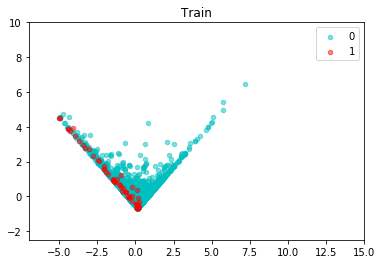

In [148]:
model__ = PCA(n_components=2)
XXX = model__.fit_transform(X_scaled)
#colors = cm.rainbow(np.linspace(0, 1, len(set(y_tr))))
colors = ['c', 'r']
for y, c in zip(set(X_tr.purp), colors):
    plt.scatter(XXX[y_tr==y, 0], 
                XXX[y_tr==y, 1], c=c, alpha=0.5, label=str(y), s = 20)
plt.legend()
#print(XXX[:,0])
i = 0
j = 1
#XXX = np.vstack((X_scaled[:,i], X_scaled[:,j]))
#plt.scatter(XXX[:,0], XXX[:,1], alpha=0.1)
# построим компоненты, полученные с использованием метода PCA:
#plot_principal_components(XXX , model__,scatter=False, legend=False)
#c_patch = mpatches.Patch(color='c', label='Principal components')
#g_patch = mpatches.Patch(color='g', label='True components')
#plt.legend(handles=[c_patch])

plt.xlim(-7,15)
plt.ylim(-2.5,10)
plt.title("Train") 
plt.draw()

In [256]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return roc_t['threshold']

In [296]:
tresh = float(Find_Optimal_Cutoff(y_train, optimizer.best_estimator_.predict_proba(X_p_train[try_to_enh])[:,1]))

In [316]:
tresh

0.07552955445939964

In [320]:
xx, yy = np.arange(-7, 15, 0.1), np.arange(-7, 15, 0.1)
xx1 = np.vstack((xx,yy)).T
for_color = pd.DataFrame(xx1, columns = ['part_del_36', 'avg_bki_cred'])
for_color

,part_del_36,avg_bki_cred
0,-7.000000e+00,-7.000000e+00
1,-6.900000e+00,-6.900000e+00
2,-6.800000e+00,-6.800000e+00
3,-6.700000e+00,-6.700000e+00
4,-6.600000e+00,-6.600000e+00
5,-6.500000e+00,-6.500000e+00
6,-6.400000e+00,-6.400000e+00
7,-6.300000e+00,-6.300000e+00
8,-6.200000e+00,-6.200000e+00
9,-6.100000e+00,-6.100000e+00


In [321]:
QQ = transform_data_to_woe1(IV_final, for_color, good_ra, good_caty)

In [325]:
QQ.part_del_36

0      0.969182
1      0.969182
2      0.969182
3      0.969182
4      0.969182
5      0.969182
6      0.969182
7      0.969182
8      0.969182
9      0.969182
10     0.969182
11     0.969182
12     0.969182
13     0.969182
14     0.969182
15     0.969182
16     0.969182
17     0.969182
18     0.969182
19     0.969182
20     0.969182
21     0.969182
22     0.969182
23     0.969182
24     0.969182
25     0.969182
26     0.969182
27     0.969182
28     0.969182
29     0.969182
30     0.969182
31     0.969182
32     0.969182
33     0.969182
34     0.969182
35     0.969182
36     0.969182
37     0.969182
38     0.969182
39     0.969182
40     0.969182
41     0.969182
42     0.969182
43     0.969182
44     0.969182
45     0.969182
46     0.969182
47     0.969182
48     0.969182
49     0.969182
50     0.969182
51     0.969182
52     0.969182
53     0.969182
54     0.969182
55     0.969182
56     0.969182
57     0.969182
58     0.969182
59     0.969182
60     0.969182
61     0.969182
62     0

In [149]:
X_tes = X_test[try_to_enh]
X_tes['purp'] = y_test
X_tes = X_tes.dropna()
X_scaled_tes = preprocessing.scale(X_tes[try_to_enh])
y_tes = X_tes['purp']

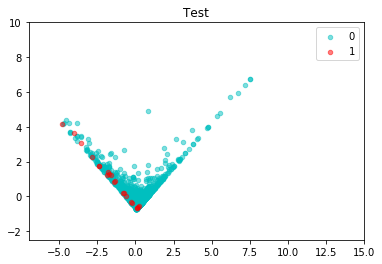

In [227]:
model__ = PCA(n_components=2)
XXX = model__.fit_transform(X_scaled_tes)
#colors = cm.rainbow(np.linspace(0, 1, len(set(y_tr))))
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
colors = ['c', 'r']
for y, c in zip(set(X_tes.purp), colors):
    plt.scatter(XXX[y_tes==y, 0], 
                XXX[y_tes==y, 1], c=c, alpha=0.5, label=str(y), s = 20)
plt.legend()
#print(XXX[:,0])
i = 0
j = 1
#XXX = np.vstack((X_scaled[:,i], X_scaled[:,j]))
#plt.scatter(XXX[:,0], XXX[:,1], alpha=0.1)
# построим компоненты, полученные с использованием метода PCA:
#plot_principal_components(XXX , model__,scatter=False, legend=False)
#c_patch = mpatches.Patch(color='c', label='Principal components')
#g_patch = mpatches.Patch(color='g', label='True components')
#plt.legend(handles=[c_patch])
#xx, yy = np.meshgrid(np.arange(-7,15, 0.02), np.arange(-2.5,10, 0.02))
#Z = model_turbo100_831.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.xlim(-7,15)
plt.ylim(-2.5,10)
plt.title("Test") 
plt.draw()